In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from astropy.cosmology import FlatLambdaCDM
import seaborn as sns
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

In [33]:
df = pd.read_excel('grb_data.xlsx')
df['GRB Name'] = 'GRB' + df['GRB Name'].astype(str)
df = df.drop(['T90'], axis= 1)

In [3]:
dfi = pd.read_csv('swift_data.csv', sep='\t')

In [4]:
dfii = pd.merge(df, dfi, on='GRB Name')

In [5]:
dfii['Luminosity Distance'] = cosmo.luminosity_distance(dfii['z'])
dfii['Rest Frame Epeak'] = (1 + dfii['z'])*dfii['Epeak']
dfii['Z'] = 1 + dfii['z']

In [6]:
# Eiso=4πD_L^2F/(1+z)
dfii['Eiso'] = 4*np.pi*dfii['Fluence']*((dfii['Luminosity Distance'])**2)/(1+dfii['z'])

In [7]:
# Lpeak = 4𝜋*(𝐷𝐿(𝑧, Ω𝑀, ΩΛ) ^2)*𝐹peak,
dfii['Lpeak'] = 4*np.pi*((dfii['Luminosity Distance'])**2)*dfii['PeakFlux']

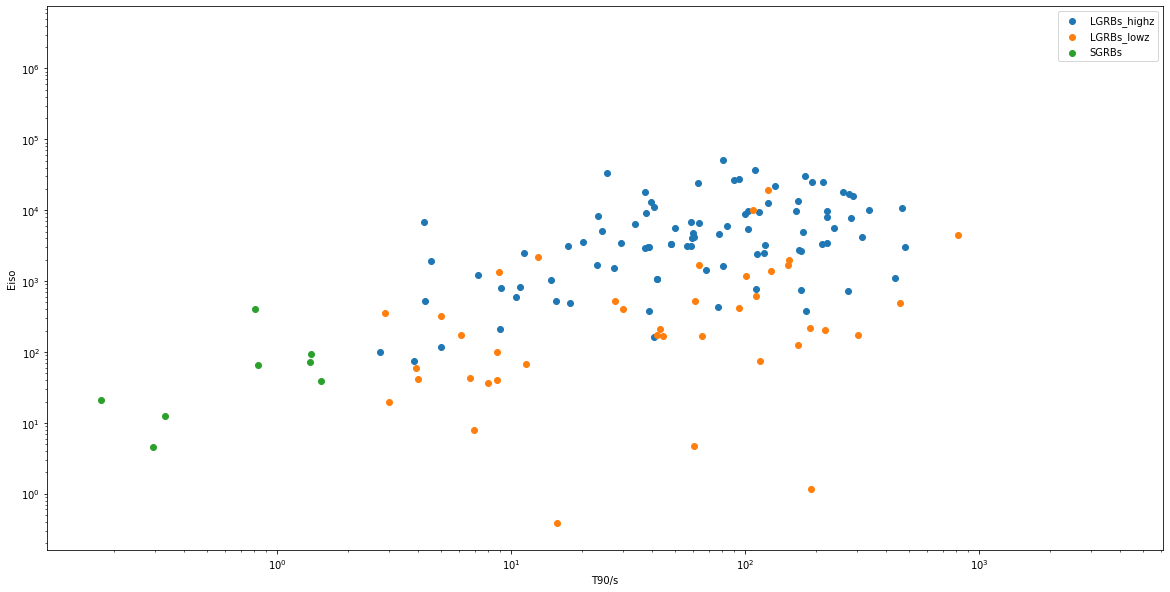

In [23]:
plt.figure(figsize=(20,10)) #sets figure size
LGRBs = dfii.loc[dfii['T90']>2]
LGRBs_highz = dfii.loc[(dfii['T90']> 2) & (dfii['z']>1)]
LGRBs_lowz = dfii.loc[(dfii['T90']> 2) & (dfii['z']<1)]
SGRBs = dfii.loc[(dfii['T90'] < 2)]

ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')

plt.scatter(LGRBs_highz['T90'], LGRBs_highz['Eiso'])
plt.scatter(LGRBs_lowz['T90'], LGRBs_lowz['Eiso'])
plt.scatter(SGRBs['T90'], SGRBs['Eiso'])

plt.xlabel('T90/s')
plt.ylabel('Eiso')
plt.legend(['LGRBs_highz','LGRBs_lowz','SGRBs'])

plt.show()

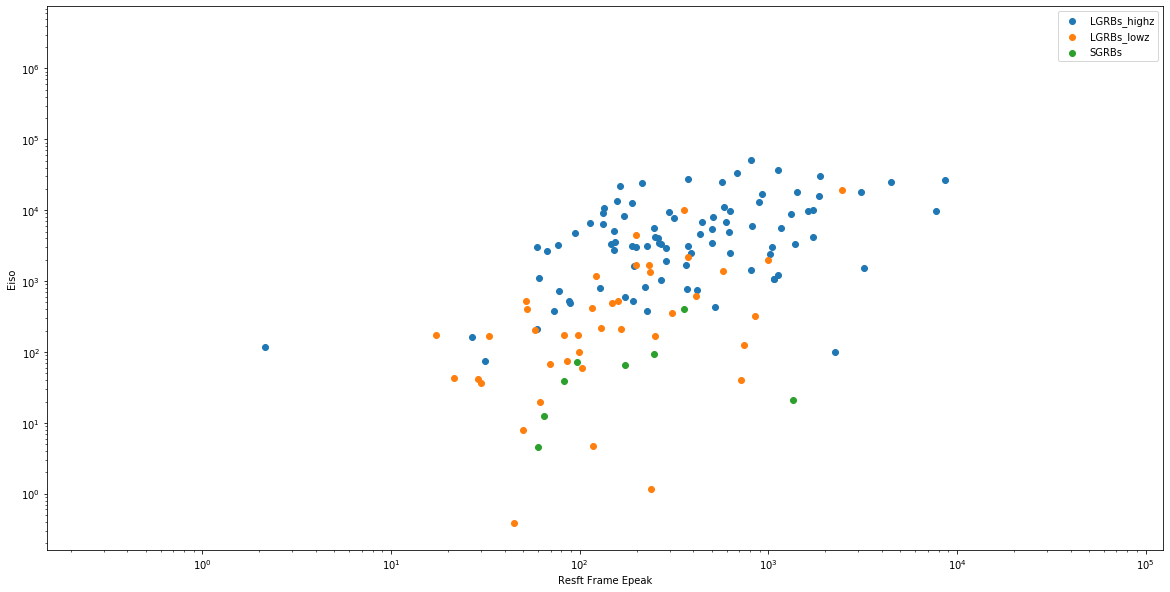

In [24]:
plt.figure(figsize=(20,10)) #sets figure size

ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')

plt.scatter(LGRBs_highz['Rest Frame Epeak'], LGRBs_highz['Eiso'])
plt.scatter(LGRBs_lowz['Rest Frame Epeak'], LGRBs_lowz['Eiso'])
plt.scatter(SGRBs['Rest Frame Epeak'], SGRBs['Eiso'])

plt.xlabel('Resft Frame Epeak')
plt.ylabel('Eiso')
plt.legend(['LGRBs_highz','LGRBs_lowz', 'SGRBs'])

plt.show()

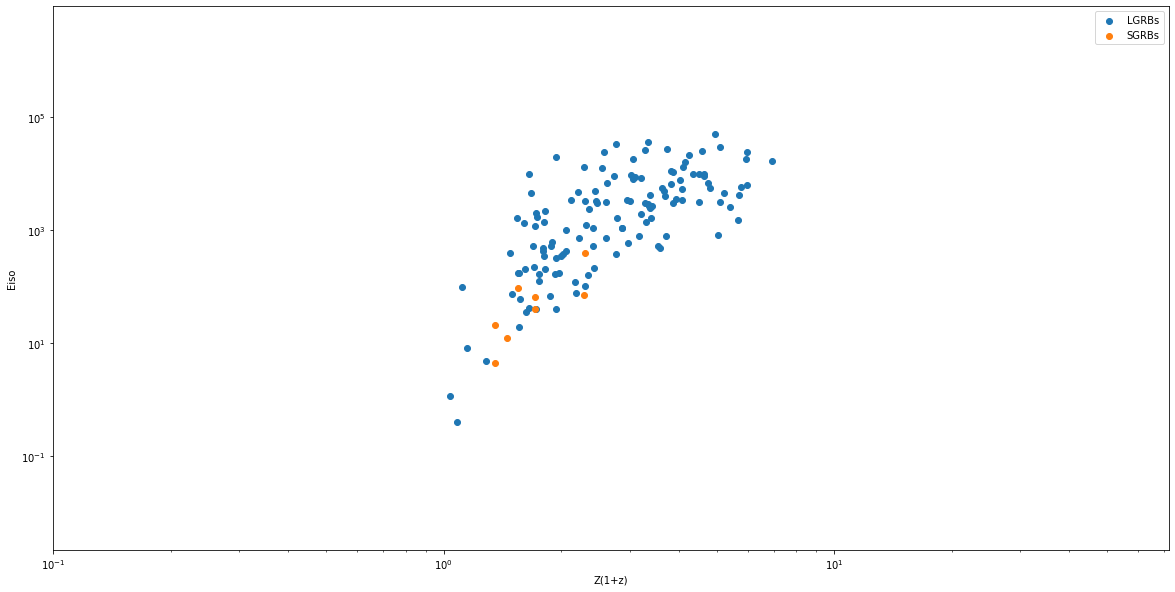

In [25]:
plt.figure(figsize=(20,10)) #sets figure size

ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')

plt.scatter(LGRBs['Z'], LGRBs['Eiso'])
plt.scatter(SGRBs['Z'], SGRBs['Eiso'])

plt.xlabel('Z(1+z)')
plt.ylabel('Eiso')
plt.legend(['LGRBs','SGRBs'])

plt.show()

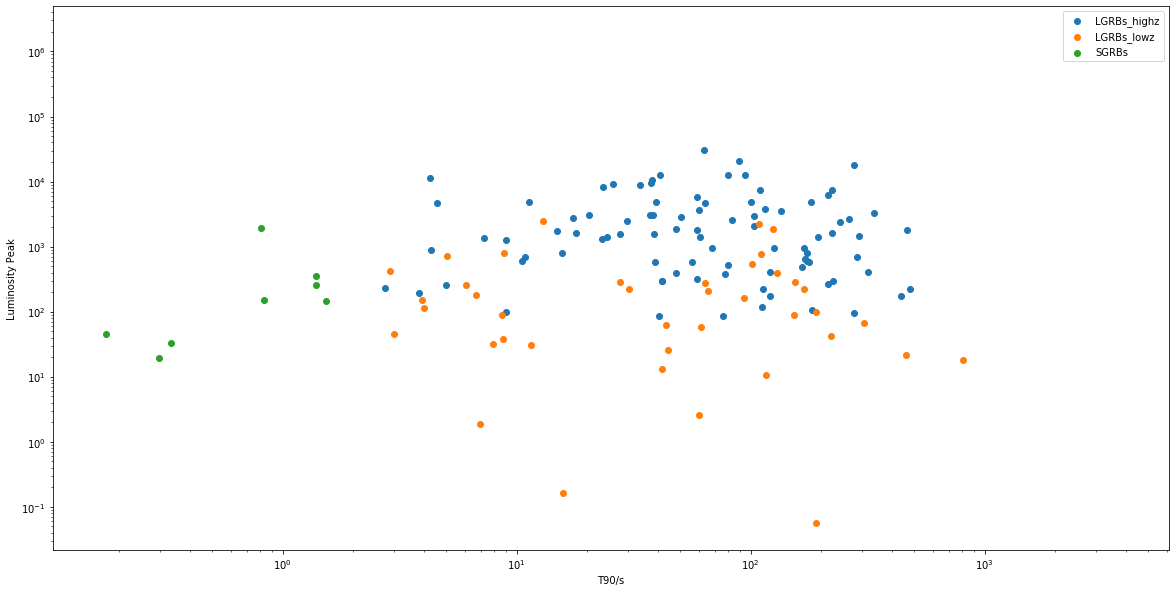

In [26]:
plt.figure(figsize=(20,10)) #sets figure size

ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')

plt.scatter(LGRBs_highz['T90'], LGRBs_highz['Lpeak'])
plt.scatter(LGRBs_lowz['T90'], LGRBs_lowz['Lpeak'])
plt.scatter(SGRBs['T90'], SGRBs['Lpeak'])

plt.xlabel('T90/s')
plt.ylabel('Luminosity Peak')
plt.legend(['LGRBs_highz','LGRBs_lowz', 'SGRBs'])

plt.show()

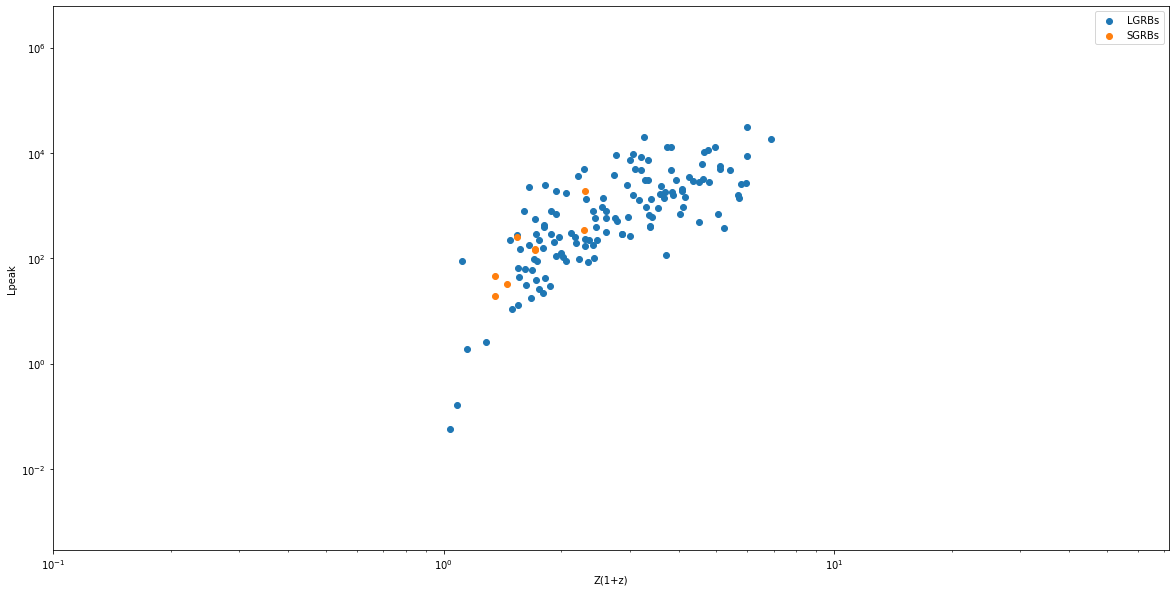

In [27]:
plt.figure(figsize=(20,10)) #sets figure size

ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')

plt.scatter(LGRBs['Z'], LGRBs['Lpeak'])
plt.scatter(SGRBs['Z'], SGRBs['Lpeak'])

plt.xlabel('Z(1+z)')
plt.ylabel('Lpeak')
plt.legend(['LGRBs','SGRBs'])

plt.show()

In [30]:
len(df)

224

In [31]:
len(dfii)

139